<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

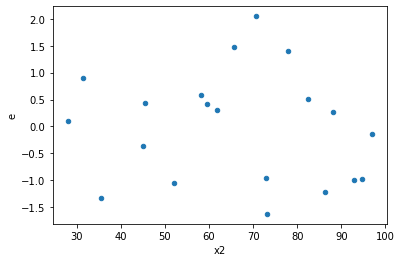

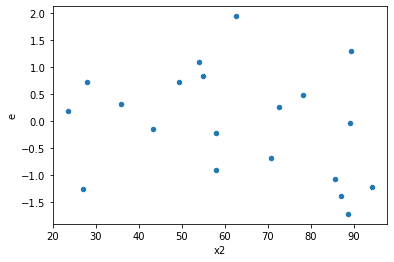

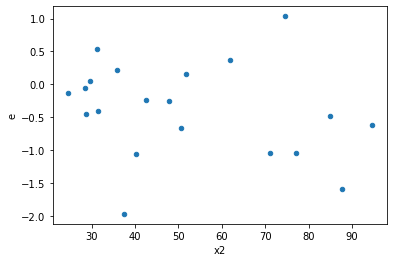

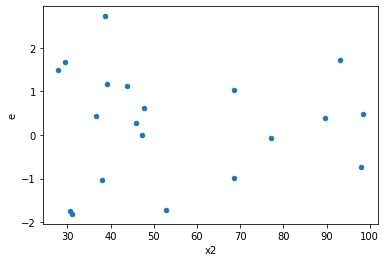

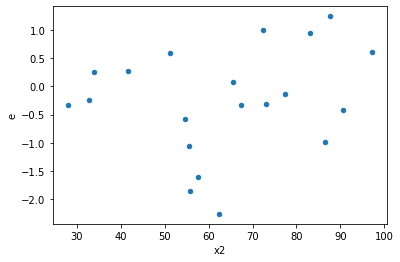

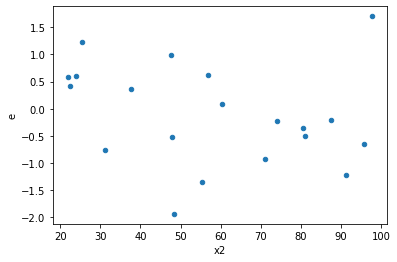

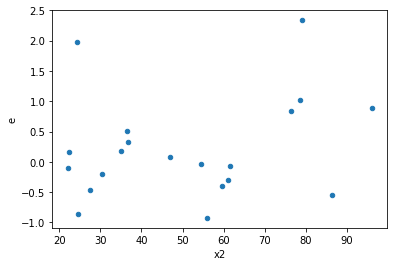

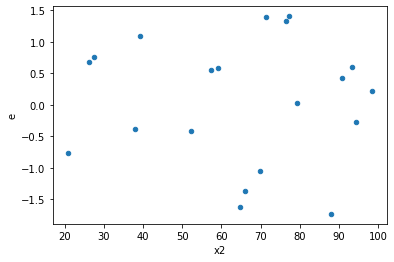

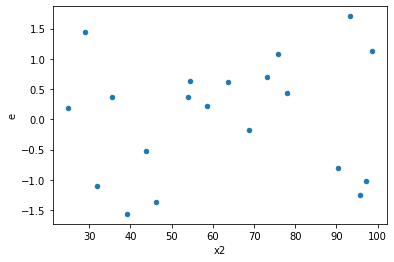

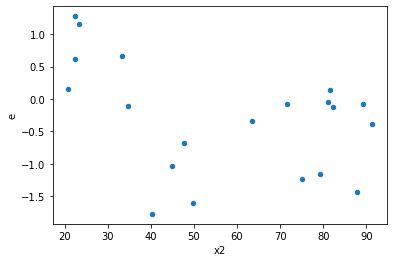

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,4.0,10.0,0.8809599142721974,13.95814400220979,0.22023997856804936,1.3958144002209791,6.337697675491295,0.016612344450973815,0.9916938277745131,0.008306172225486907,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,3.0048882727200956,6.619873035748117,0.42926975324572797,0.9456961479640167,2.203034667161069,0.31918653720230705,0.8404067313988465,0.15959326860115353,Reject001=1 : Homoscedasticity
6.0,4.0,10.0,0.2926694887359609,10.870971234446351,0.07316737218399022,1.0870971234446352,14.85767618810975,0.0006544769123306704,0.9996727615438347,0.0003272384561653352,Reject001=0 : Heteroscedasticity
7.0,10.0,4.0,5.1685731489802675,2.5915051423587383,0.5168573148980268,0.6478762855896846,1.2534915670440054,0.8935462072878042,0.5532268963560979,0.4467731036439021,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,7.381462311780165,6.342564083029266,0.9226827889725207,1.057094013838211,1.1456743601074078,0.8932693337433475,0.5533653331283263,0.44663466687167375,Reject001=1 : Homoscedasticity
9.0,7.0,7.0,2.7981879688843176,2.951604129254068,0.3997411384120454,0.42165773275058116,1.0548269673359076,0.945676040281691,0.5271619798591545,0.4728380201408455,Reject001=1 : Homoscedasticity
12.0,6.0,8.0,1.7789736379849665,9.558752000861967,0.2964956063308278,1.1948440001077458,4.029887710290543,0.07373548005802011,0.96313225997099,0.036867740029010054,Reject001=1 : Homoscedasticity
16.0,7.0,7.0,9.275308420459616,12.321724810172036,1.3250440600656594,1.760246401453148,1.32844367557553,0.7173628191817798,0.6413185904091101,0.3586814095908899,Reject001=1 : Homoscedasticity
18.0,6.0,8.0,2.3993005489984003,5.7507366375522135,0.3998834248330667,0.7188420796940267,1.7976290965150927,0.43366840224475744,0.7831657988776213,0.21683420112237872,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,4.0,13.878271873555668,2.105577493290751,1.3878271873555668,0.5263943733226878,0.37929389056407314,0.19482113824674926,Reject001=1 : Homoscedasticity
1.0,11.0,3.0,9.436212903347396,0.10308353570675258,0.8578375366679452,0.03436117856891752,0.040055578241988465,6.568769419981102e-05,Reject001=0 : Heteroscedasticity
2.0,8.0,6.0,5.229211955954378,2.438087726593391,0.6536514944942973,0.4063479544322319,0.6216584186755455,0.5212195625598359,Reject001=1 : Homoscedasticity
3.0,4.0,10.0,0.8809599142721974,13.95814400220979,0.22023997856804936,1.3958144002209791,6.337697675491295,0.016612344450973815,Reject001=1 : Homoscedasticity
4.0,8.0,6.0,6.9511006367591435,3.17756783212112,0.8688875795948929,0.5295946386868533,0.6095088146314275,0.5050182841674603,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,3.0048882727200956,6.619873035748117,0.42926975324572797,0.9456961479640167,2.203034667161069,0.31918653720230705,Reject001=1 : Homoscedasticity
6.0,4.0,10.0,0.2926694887359609,10.870971234446351,0.07316737218399022,1.0870971234446352,14.85767618810975,0.0006544769123306704,Reject001=0 : Heteroscedasticity
7.0,10.0,4.0,5.1685731489802675,2.5915051423587383,0.5168573148980268,0.6478762855896846,1.2534915670440054,0.8935462072878042,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,7.381462311780165,6.342564083029266,0.9226827889725207,1.057094013838211,1.1456743601074078,0.8932693337433475,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      928
Reject001=0 : Heteroscedasticity     72
Name: Result_test, dtype: int64